# Discussion Related with outliers and Impact on Machine Learning.

### Which Machine Learning models are sensitive to outliers.
1. Naive Bayes Classifier----------------------------------------- Not Sensitive to outliers.
2. SVM------------------------------------------------------------ Not Sensitive to outliers. 
3. Linear Regression---------------------------------------------- Sensitive to outliers.
4. Logistic Regression-------------------------------------------- Sensitive to outliers.
5. Decision Tree Regressor or Classifier-------------------------- Not Sensitive to outliers. 
6. Ensemble techiques(RandomForest,XGBoost,Gradient Boosting) ---- Not Sensitive to outliers.
7. KNN------------------------------------------------------------ Not Sensitive to outliers.
8. K means-------------------------------------------------------- Sensitive to outliers.
9. Hierarichal---------------------------------------------------- Sensitive to outliers.
10. DBSCAN-------------------------------------------------------- Sensitive to outliers.
11. PCA----------------------------------------------------------- ***Very*** Sensitive to outliers.
12. Neural Networks----------------------------------------------- Sensitive to outliers.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("D:/Datasets/titanic.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
 df['Age'].isnull().sum()

177

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


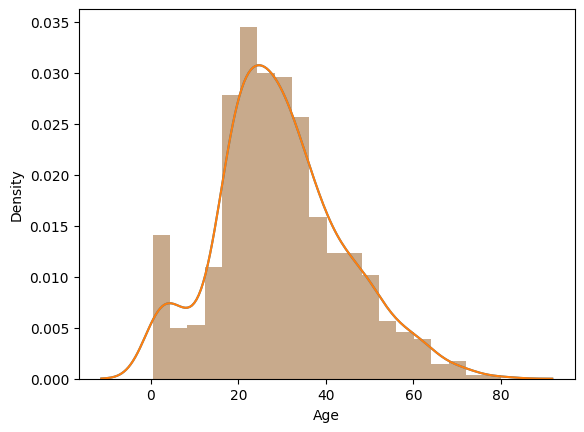

In [10]:
sns.distplot(df['Age'].dropna())
plt.show()

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


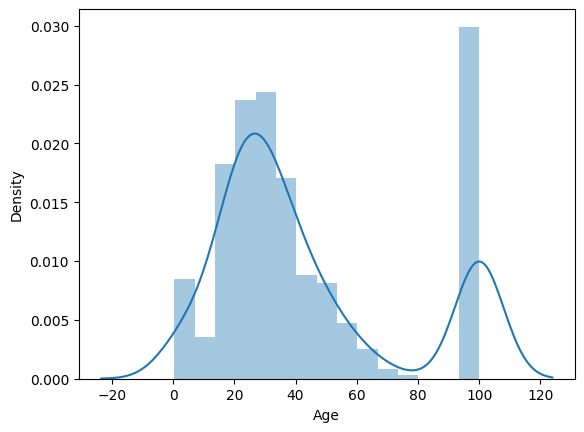

In [11]:
### adding some outliers.

sns.distplot(df['Age'].fillna(100))
plt.show()

# Feature Gaussian Distributed

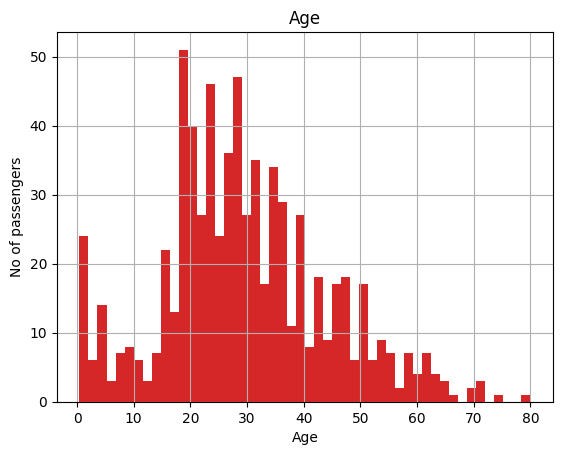

In [15]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')
plt.show()

Now this is normally distributed. 

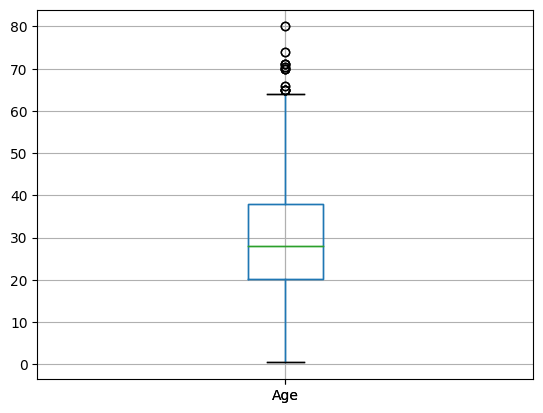

In [17]:
## Box PLOT
figure = df.boxplot(column='Age')
plt.show()

In [19]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Assuming Age follows Gaussian Distribution, we will calculate the boundaries which differentiates the outliers.

# In Gaussian Distribution. Focus only till this. Only apply this code. NOT the IQR or Extreme outlier , those all will be applied on skewed feature.

In [37]:
upper_boundary = df["Age"].mean()+3*df['Age'].std()
lower_boundary = df['Age'].mean()-3*df['Age'].std()

In [38]:
upper_boundary

73.27860964406095

In [39]:
lower_boundary

-13.88037434994331

***<h1>IMP Anything above 73.27 will be considered as an outlier.</h1>***

# Feature is Skewed 

### Let's compute the Interquantile Range to calculate the boundaries.

In [55]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [56]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

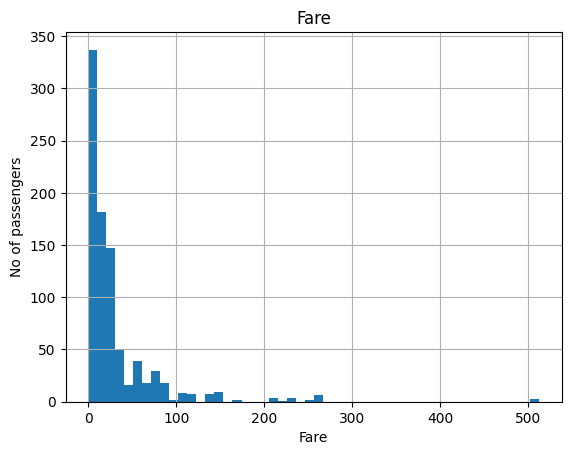

In [57]:
### PLOT

figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')
plt.show()

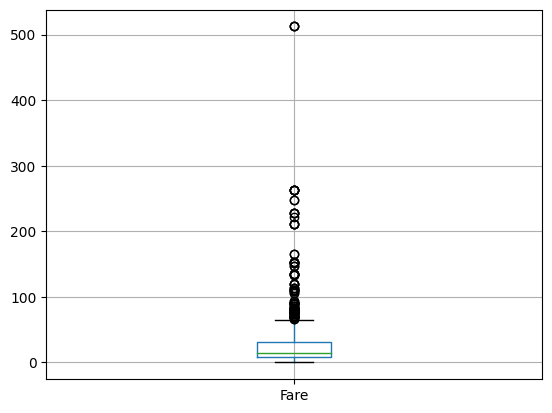

In [58]:
## Box PLOT
figure = df.boxplot(column='Fare')
plt.show()

In [59]:
### Outliers
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
higher_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)
print(lower_bridge,'\n',higher_bridge)

-26.724 
 65.6344


In [60]:
#### EXTREME OUTLIERS.
lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
higher_bridge = df['Fare'].quantile(0.75) + (IQR*3)
print(lower_bridge,'\n',higher_bridge)

-61.358399999999996 
 100.2688


# Removing The outlier With respect to Age.

***The upper limit for AGE is 73.27***

In [61]:
df_copy = df.copy()

In [62]:
df_copy.loc[df['Age']>73,'Age'] = 73

In [63]:
df_copy['Age'].describe()

count    714.000000
mean      29.687913
std       14.490589
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       73.000000
Name: Age, dtype: float64

***Now the max value is 73***

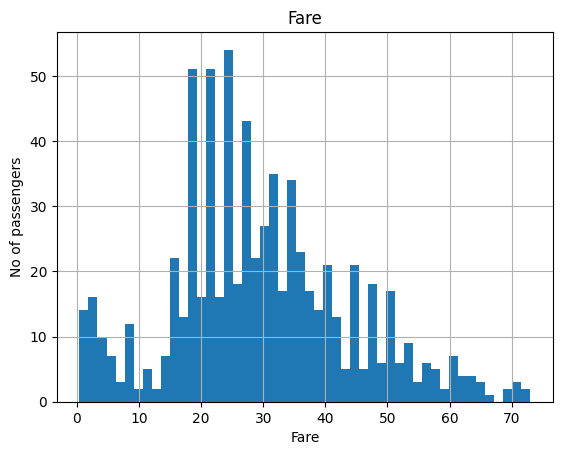

In [68]:
### PLOT

figure = df_copy.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')
plt.show()

# Removing The outlier With respect to Fare.

***The upper limit for AGE is 100***

In [65]:
df_copy.loc[df['Fare']>100,'Fare'] = 100

In [66]:
df_copy['Fare'].describe()

count    891.000000
mean      27.027169
std       27.296632
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      100.000000
Name: Fare, dtype: float64

***Now the max value is 100***

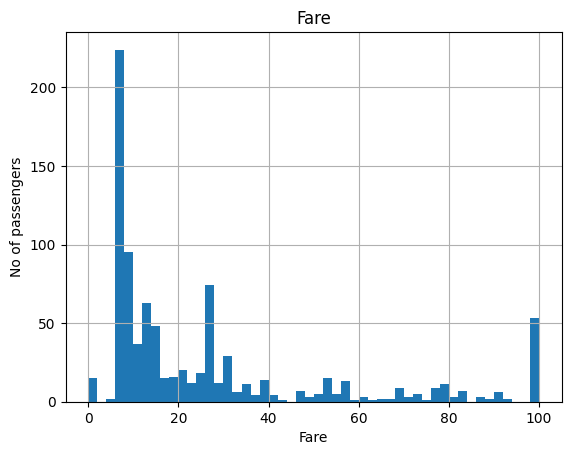

In [67]:
### PLOT

figure = df_copy.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')
plt.show()

In [69]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test = train_test_split(df_copy[['Age','Fare']].fillna(0),df_copy['Survived'],test_size=0.60,random_state = 0)

In [77]:
# logistic Regression
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [82]:
y_pred = logit.predict(x_test)
y_pred1 = logit.predict_proba(x_test)

In [83]:
logit.score(x_test,y_test)

0.6878504672897197

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [89]:
print(f"Accuracy Score{accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix{confusion_matrix(y_test,y_pred)}")

Accuracy Score0.6878504672897197
Confusion Matrix[[310  31]
 [136  58]]
